In [40]:
import pandas as pd
import requests
import random
from time import sleep
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import numpy as np
import nltk
import os
from sklearn import datasets
import datetime
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
fitbit_df = pd.read_pickle("Data/fitbit_all.pkl")

In [42]:
fitbit_df.tail()

,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active
Date,,,,,,,,,,
2018-08-23,10359,7.75889,3141,11,33,1454,710,159,38,52
2018-08-24,8696,6.51330,3216,17,51,1522,820,221,39,24
2018-08-25,165,0.12358,1977,0,0,109,757,15,0,0
2018-08-26,13286,11.05997,3080,25,76,1401,1247,103,9,81
2018-08-27,6360,4.76364,2801,8,24,1028,1254,134,29,23


In [43]:
mfp_exercise_df = pd.read_csv('Data/myfitnesspal/Exercise-Summary-2014-03-04-to-2018-08-29.csv') 
mfp_measurements_df = pd.read_csv('Data/myfitnesspal/Measurement-Summary-2014-03-04-to-2018-08-29.csv')
mfp_nutrition_df = pd.read_csv('Data/myfitnesspal/Nutrition-Summary-2014-03-04-to-2018-08-29.csv')

mfp_exercise_df.Date = pd.to_datetime(mfp_exercise_df.Date)
mfp_measurements_df.Date = pd.to_datetime(mfp_measurements_df.Date)
mfp_nutrition_df.Date = pd.to_datetime(mfp_nutrition_df.Date)

In [44]:
mfp_nutrition_df.head()

,Date,Meal,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,Carbohydrates (g),Fiber,Sugar,Protein (g),Vitamin A,Vitamin C,Calcium,Iron,Note
0,2014-03-04,Breakfast,603.8,36.1,11.7,3.9,8.7,0.0,764.2,602.4,252.5,4.0,0.0,3.2,39.4,19.3,0.6,14.3,37.2,NaN
1,2014-03-04,Lunch,540.0,24.0,6.0,0.0,0.0,0.0,0.0,185.0,0.0,37.0,3.0,25.0,10.0,0.0,0.0,4.0,8.0,NaN
2,2014-03-04,Dinner,895.7,7.7,5.2,0.3,0.3,0.0,0.0,2086.2,41.9,98.2,1.8,0.3,34.0,0.0,0.0,1.0,2.3,NaN
3,2014-03-05,Breakfast,603.8,36.1,11.7,3.9,8.7,0.0,764.2,602.4,252.5,4.0,0.0,3.2,39.4,19.3,0.6,14.3,37.2,NaN
4,2014-03-05,Lunch,540.0,24.0,6.0,0.0,0.0,0.0,0.0,185.0,0.0,37.0,3.0,25.0,10.0,0.0,0.0,4.0,8.0,NaN


In [45]:
mfp_nutrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2213 entries, 0 to 2212
Data columns (total 20 columns):
Date                   2213 non-null datetime64[ns]
Meal                   2213 non-null object
Calories               2213 non-null float64
Fat (g)                2213 non-null float64
Saturated Fat          2213 non-null float64
Polyunsaturated Fat    2213 non-null float64
Monounsaturated Fat    2213 non-null float64
Trans Fat              2213 non-null float64
Cholesterol            2213 non-null float64
Sodium (mg)            2213 non-null float64
Potassium              2213 non-null float64
Carbohydrates (g)      2213 non-null float64
Fiber                  2213 non-null float64
Sugar                  2213 non-null float64
Protein (g)            2213 non-null float64
Vitamin A              2213 non-null float64
Vitamin C              2213 non-null float64
Calcium                2213 non-null float64
Iron                   2213 non-null float64
Note                   0 non-nul

In [46]:
mfp_nutrition_df_breakfast = mfp_nutrition_df[mfp_nutrition_df['Meal'] == 'Breakfast']

mfp_nutrition_df_breakfast = mfp_nutrition_df_breakfast.rename(columns = {'Calories':'Calories_Breakfast', 'Fat (g)': 'Fat_(g)_Breakfast',
                                             'Saturated Fat':'Saturated_Fat_Breakfast',
                                             'Polyunsaturated Fat':'Polyunsaturated_Fat_Breakfast',
                                             'Monounsaturated Fat':'Monounsaturated_Fat_Breakfast',
                                             'Trans Fat':'Trans_Fat_Breakfast', 'Cholesterol':'Cholesterol_Breakfast',
                                             'Sodium (mg)':'Sodium_(mg)_Breakfast', 'Potassium':'Potassium_Breakfast',
                                             'Carbohydrates (g)':'Carbohydrates_(g)_Breakfast', 'Fiber':'Fiber_Breakfast',
                                             'Sugar':'Sugar_Breakfast', 'Protein (g)':'Protein_(g)_Breakfast',
                                             'Vitamin A':'Vitamin_A_Breakfast', 'Vitamin C':'Vitamin_C_Breakfast',
                                             'Calcium':'Calcium_Breakfast', 'Iron':'Iron_Breakfast'})

mfp_nutrition_df_breakfast = mfp_nutrition_df_breakfast.drop(['Meal', 'Note'], axis=1)

mfp_nutrition_df_breakfast

,Date,Calories_Breakfast,Fat_(g)_Breakfast,Saturated_Fat_Breakfast,Polyunsaturated_Fat_Breakfast,Monounsaturated_Fat_Breakfast,Trans_Fat_Breakfast,Cholesterol_Breakfast,Sodium_(mg)_Breakfast,Potassium_Breakfast,Carbohydrates_(g)_Breakfast,Fiber_Breakfast,Sugar_Breakfast,Protein_(g)_Breakfast,Vitamin_A_Breakfast,Vitamin_C_Breakfast,Calcium_Breakfast,Iron_Breakfast
0,2014-03-04,603.8,36.1,11.7,3.9,8.7,0.0,764.2,602.4,252.5,4.0,0.0,3.2,39.4,19.3,0.6,14.3,37.2
3,2014-03-05,603.8,36.1,11.7,3.9,8.7,0.0,764.2,602.4,252.5,4.0,0.0,3.2,39.4,19.3,0.6,14.3,37.2
7,2014-03-06,525.0,38.8,13.5,5.2,11.6,0.0,888.9,1208.2,336.7,5.4,0.0,4.2,36.1,25.7,0.8,17.3,16.3
13,2014-03-08,855.0,26.0,2.1,2.1,2.0,0.0,1350.0,501.0,422.0,92.0,6.1,23.0,31.3,1.0,17.0,0.0,1.0
14,2014-03-09,405.0,16.5,2.3,0.0,0.0,0.1,70.0,590.0,284.0,32.0,1.0,5.5,33.0,11.0,9.0,7.5,14.0
17,2014-03-10,105.0,1.0,0.1,0.1,0.0,0.0,0.0,1.0,422.0,27.0,3.1,14.0,1.3,1.0,17.0,0.0,1.0
20,2014-03-11,240.0,1.0,0.0,0.0,0.0,0.0,0.0,400.0,110.0,56.0,2.0,18.0,4.0,20.0,20.0,20.0,50.0
23,2014-03-12,105.0,1.0,0.1,0.1,0.0,0.0,0.0,1.0,422.0,27.0,3.1,14.0,1.3,1.0,17.0,0.0,1.0
27,2014-03-14,120.0,3.0,0.5,0.0,0.0,0.0,0.0,110.0,0.0,24.0,3.0,12.0,2.0,15.0,0.0,20.0,10.0
30,2014-08-28,640.0,26.0,11.0,0.0,0.0,0.0,115.0,1525.0,0.0,70.0,4.0,7.0,28.0,6.0,0.0,15.0,25.0


In [47]:
mfp_nutrition_df_lunch = mfp_nutrition_df[mfp_nutrition_df['Meal'] == 'Lunch']

mfp_nutrition_df_lunch = mfp_nutrition_df_lunch.rename(columns = {'Calories':'Calories_Lunch', 'Fat (g)': 'Fat_(g)_Lunch',
                                             'Saturated Fat':'Saturated_Fat_Lunch',
                                             'Polyunsaturated Fat':'Polyunsaturated_Fat_Lunch',
                                             'Monounsaturated Fat':'Monounsaturated_Fat_Lunch',
                                             'Trans Fat':'Trans_Fat_Lunch', 'Cholesterol':'Cholesterol_Lunch',
                                             'Sodium (mg)':'Sodium_(mg)_Lunch', 'Potassium':'Potassium_Lunch',
                                             'Carbohydrates (g)':'Carbohydrates_(g)_Lunch', 'Fiber':'Fiber_Lunch',
                                             'Sugar':'Sugar_Lunch', 'Protein (g)':'Protein_(g)_Lunch',
                                             'Vitamin A':'Vitamin_A_Lunch', 'Vitamin C':'Vitamin_C_Lunch',
                                             'Calcium':'Calcium_Lunch', 'Iron':'Iron_Lunch'})

mfp_nutrition_df_lunch = mfp_nutrition_df_lunch.drop(['Meal', 'Note'], axis=1)


mfp_nutrition_df_lunch

,Date,Calories_Lunch,Fat_(g)_Lunch,Saturated_Fat_Lunch,Polyunsaturated_Fat_Lunch,Monounsaturated_Fat_Lunch,Trans_Fat_Lunch,Cholesterol_Lunch,Sodium_(mg)_Lunch,Potassium_Lunch,Carbohydrates_(g)_Lunch,Fiber_Lunch,Sugar_Lunch,Protein_(g)_Lunch,Vitamin_A_Lunch,Vitamin_C_Lunch,Calcium_Lunch,Iron_Lunch
1,2014-03-04,540.0,24.0,6.0,0.0,0.0,0.0,0.0,185.0,0.0,37.0,3.0,25.0,10.0,0.0,0.0,4.0,8.0
4,2014-03-05,540.0,24.0,6.0,0.0,0.0,0.0,0.0,185.0,0.0,37.0,3.0,25.0,10.0,0.0,0.0,4.0,8.0
8,2014-03-06,175.0,5.0,1.3,0.0,0.0,0.0,37.5,2250.0,0.0,22.5,2.5,0.0,7.5,5.0,0.0,0.0,5.0
11,2014-03-07,514.8,18.2,9.8,0.3,2.9,0.0,125.2,1449.1,482.8,1.0,1.2,2.3,41.4,110.0,13.8,42.7,19.0
15,2014-03-09,360.0,12.0,7.0,0.0,1.0,0.0,30.0,640.0,0.0,42.8,2.0,6.0,15.5,6.0,0.0,26.5,8.0
18,2014-03-10,365.0,18.5,8.5,0.0,0.0,0.0,90.0,690.0,409.0,22.0,9.0,4.0,38.0,24.0,124.0,15.0,8.0
21,2014-03-11,275.0,18.0,11.2,0.5,5.2,0.0,82.2,1028.4,58.8,1.5,0.0,0.0,30.5,15.0,3.0,40.0,5.0
24,2014-03-12,700.8,30.5,9.3,0.0,0.0,0.0,140.0,2330.0,409.0,53.7,12.3,9.0,59.7,82.3,157.3,18.3,18.0
28,2014-03-14,417.5,23.8,8.5,0.0,0.0,0.0,90.0,830.0,409.0,22.0,9.0,4.0,38.0,24.0,124.0,15.0,8.0
32,2014-08-29,470.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,0.0,0.5,6.5,0.0,0.0,0.0,0.0


In [48]:
mfp_nutrition_df_dinner = mfp_nutrition_df[mfp_nutrition_df['Meal'] == 'Dinner']

mfp_nutrition_df_dinner = mfp_nutrition_df_dinner.rename(columns = {'Calories':'Calories_Dinner', 'Fat (g)': 'Fat_(g)_Dinner',
                                             'Saturated Fat':'Saturated_Fat_Dinner',
                                             'Polyunsaturated Fat':'Polyunsaturated_Fat_Dinner',
                                             'Monounsaturated Fat':'Monounsaturated_Fat_Dinner',
                                             'Trans Fat':'Trans_Fat_Dinner', 'Cholesterol':'Cholesterol_Dinner',
                                             'Sodium (mg)':'Sodium_(mg)_Dinner', 'Potassium':'Potassium_Dinner',
                                             'Carbohydrates (g)':'Carbohydrates_(g)_Dinner', 'Fiber':'Fiber_Dinner',
                                             'Sugar':'Sugar_Dinner', 'Protein (g)':'Protein_(g)_Dinner',
                                             'Vitamin A':'Vitamin_A_Dinner', 'Vitamin C':'Vitamin_C_Dinner',
                                             'Calcium':'Calcium_Dinner', 'Iron':'Iron_Dinner'})

mfp_nutrition_df_dinner = mfp_nutrition_df_dinner.drop(['Meal', 'Note'], axis=1)

mfp_nutrition_df_dinner

,Date,Calories_Dinner,Fat_(g)_Dinner,Saturated_Fat_Dinner,Polyunsaturated_Fat_Dinner,Monounsaturated_Fat_Dinner,Trans_Fat_Dinner,Cholesterol_Dinner,Sodium_(mg)_Dinner,Potassium_Dinner,Carbohydrates_(g)_Dinner,Fiber_Dinner,Sugar_Dinner,Protein_(g)_Dinner,Vitamin_A_Dinner,Vitamin_C_Dinner,Calcium_Dinner,Iron_Dinner
2,2014-03-04,895.7,7.7,5.2,0.3,0.3,0.0,0.0,2086.2,41.9,98.2,1.8,0.3,34.0,0.0,0.0,1.0,2.3
5,2014-03-05,542.8,16.7,6.0,0.1,0.0,0.0,144.0,123.3,246.2,7.3,2.1,3.8,24.5,14.5,9.9,4.8,33.6
9,2014-03-06,320.0,3.1,0.5,0.0,0.0,0.0,65.0,1876.0,556.0,36.0,3.5,34.7,35.2,25.0,135.0,7.0,25.0
12,2014-03-07,560.0,42.0,16.0,0.0,0.0,3.0,160.0,680.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,8.0,20.0
16,2014-03-09,350.4,4.3,0.7,0.2,0.1,0.0,81.3,102.4,774.1,42.8,4.1,9.0,36.9,6.1,140.1,4.3,10.5
19,2014-03-10,917.7,34.7,11.1,0.2,0.2,0.0,330.0,2036.2,68.0,43.0,12.7,11.3,119.1,18.4,59.6,27.5,31.5
22,2014-03-11,595.0,6.9,2.4,0.1,0.1,0.0,154.4,661.5,615.2,55.0,3.3,27.6,77.9,12.0,125.7,14.4,24.7
25,2014-03-12,187.5,4.2,1.0,2.0,1.0,0.0,0.0,472.3,222.7,30.2,2.3,2.2,5.6,21.1,104.3,0.6,16.5
29,2014-03-14,546.6,27.8,7.0,2.2,1.9,0.0,94.7,1291.8,520.2,30.4,1.9,1.3,38.4,8.5,3.4,19.8,19.1
37,2015-05-24,1152.0,80.0,16.0,0.0,0.0,0.0,416.0,1056.0,0.0,16.0,0.0,0.0,96.0,0.0,0.0,0.0,0.0


In [49]:
mfp_nutrition_df_snacks = mfp_nutrition_df[mfp_nutrition_df['Meal'] == 'Snacks']

mfp_nutrition_df_snacks = mfp_nutrition_df_snacks.rename(columns = {'Calories':'Calories_Snacks', 'Fat (g)': 'Fat_(g)_Snacks',
                                             'Saturated Fat':'Saturated_Fat_Snacks',
                                             'Polyunsaturated Fat':'Polyunsaturated_Fat_Snacks',
                                             'Monounsaturated Fat':'Monounsaturated_Fat_Snacks',
                                             'Trans Fat':'Trans_Fat_Snacks', 'Cholesterol':'Cholesterol_Snacks',
                                             'Sodium (mg)':'Sodium_(mg)_Snacks', 'Potassium':'Potassium_Snacks',
                                             'Carbohydrates (g)':'Carbohydrates_(g)_Snacks', 'Fiber':'Fiber_Snacks',
                                             'Sugar':'Sugar_Snacks', 'Protein (g)':'Protein_(g)_Snacks',
                                             'Vitamin A':'Vitamin_A_Snacks', 'Vitamin C':'Vitamin_C_Snacks',
                                             'Calcium':'Calcium_Snacks', 'Iron':'Iron_Snacks'})

mfp_nutrition_df_snacks = mfp_nutrition_df_snacks.drop(['Meal', 'Note'], axis=1)


mfp_nutrition_df_snacks

,Date,Calories_Snacks,Fat_(g)_Snacks,Saturated_Fat_Snacks,Polyunsaturated_Fat_Snacks,Monounsaturated_Fat_Snacks,Trans_Fat_Snacks,Cholesterol_Snacks,Sodium_(mg)_Snacks,Potassium_Snacks,Carbohydrates_(g)_Snacks,Fiber_Snacks,Sugar_Snacks,Protein_(g)_Snacks,Vitamin_A_Snacks,Vitamin_C_Snacks,Calcium_Snacks,Iron_Snacks
6,2014-03-05,110.0,2.5,1.5,0.0,1.0,0.0,0.0,130.0,115.0,21.0,2.0,14.0,1.0,0.0,0.0,30.0,6.0
10,2014-03-06,810.0,33.0,15.0,1.0,1.0,0.0,70.0,755.0,230.0,115.0,7.0,74.0,21.0,42.0,20.0,74.0,56.0
26,2014-03-12,600.0,22.5,2.5,10.0,10.0,0.0,0.0,250.0,0.0,105.0,10.0,0.0,10.0,0.0,0.0,20.0,0.0
38,2015-05-24,156.3,12.5,2.2,0.0,0.0,0.0,0.0,65.6,0.0,6.9,1.9,2.5,5.6,0.0,0.0,1.3,3.8
50,2015-05-28,420.0,4.5,1.0,0.0,0.0,0.0,7.5,560.0,260.0,48.0,3.0,25.0,45.5,0.0,70.0,40.0,31.0
56,2015-05-30,480.0,6.0,2.0,0.0,0.0,0.0,0.0,400.0,520.0,90.0,6.0,50.0,16.0,0.0,140.0,50.0,50.0
59,2015-06-03,420.0,4.5,1.0,0.0,0.0,0.0,7.5,560.0,260.0,48.0,3.0,25.0,45.5,0.0,70.0,40.0,31.0
67,2015-06-08,1446.0,57.4,16.2,0.6,4.0,0.0,73.6,1230.2,1998.0,122.2,12.0,83.0,119.2,31.6,32.4,119.6,29.2
69,2015-06-16,240.0,3.0,1.0,0.0,0.0,0.0,0.0,200.0,260.0,45.0,3.0,25.0,8.0,0.0,70.0,25.0,25.0
74,2015-06-24,240.0,3.0,1.0,0.0,0.0,0.0,0.0,200.0,260.0,45.0,3.0,25.0,8.0,0.0,70.0,25.0,25.0


In [50]:
mfp_nutrition_df = mfp_nutrition_df.groupby('Date', as_index=False)[['Calories', 'Fat (g)', 'Saturated Fat', 'Polyunsaturated Fat',
                               'Monounsaturated Fat', 'Trans Fat', 'Cholesterol', 'Sodium (mg)',
                               'Potassium', 'Carbohydrates (g)', 'Fiber', 'Sugar', 'Protein (g)',
                               'Vitamin A', 'Vitamin C', 'Calcium', 'Iron']].sum()

In [51]:
mfp_nutrition_df = mfp_nutrition_df.merge(mfp_nutrition_df_breakfast, left_on='Date', right_on='Date', how='left')
mfp_nutrition_df = mfp_nutrition_df.merge(mfp_nutrition_df_lunch, left_on='Date', right_on='Date', how='left')
mfp_nutrition_df = mfp_nutrition_df.merge(mfp_nutrition_df_dinner, left_on='Date', right_on='Date', how='left')
mfp_nutrition_df = mfp_nutrition_df.merge(mfp_nutrition_df_snacks, left_on='Date', right_on='Date', how='left')

mfp_nutrition_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 0 to 800
Data columns (total 86 columns):
Date                             801 non-null datetime64[ns]
Calories                         801 non-null float64
Fat (g)                          801 non-null float64
Saturated Fat                    801 non-null float64
Polyunsaturated Fat              801 non-null float64
Monounsaturated Fat              801 non-null float64
Trans Fat                        801 non-null float64
Cholesterol                      801 non-null float64
Sodium (mg)                      801 non-null float64
Potassium                        801 non-null float64
Carbohydrates (g)                801 non-null float64
Fiber                            801 non-null float64
Sugar                            801 non-null float64
Protein (g)                      801 non-null float64
Vitamin A                        801 non-null float64
Vitamin C                        801 non-null float64
Calcium                 

In [52]:
mfp_nutrition_df.sort_values(by=['Date'])

mfp_nutrition_df.tail(100)

,Date,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,...,Sodium_(mg)_Snacks,Potassium_Snacks,Carbohydrates_(g)_Snacks,Fiber_Snacks,Sugar_Snacks,Protein_(g)_Snacks,Vitamin_A_Snacks,Vitamin_C_Snacks,Calcium_Snacks,Iron_Snacks
701,2018-05-02,1327.0,44.7,12.7,2.2,3.5,0.0,105.0,2005.3,321.7,...,415.3,36.7,46.9,2.0,10.7,7.0,0.0,0.0,1.3,4.0
702,2018-05-03,1598.7,82.9,28.2,4.3,10.9,0.4,721.9,2878.8,811.3,...,170.0,0.0,13.0,2.0,9.0,6.0,0.0,0.0,0.0,0.0
703,2018-05-04,373.7,22.2,10.5,1.2,4.3,0.0,182.0,728.3,113.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
704,2018-05-05,606.3,42.7,17.9,5.5,15.1,0.6,631.4,1600.1,902.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
705,2018-05-07,1091.8,57.9,16.3,9.9,8.7,0.0,627.0,2284.6,308.0,...,406.3,0.0,15.0,0.6,2.5,1.9,1.3,2.5,0.0,1.3
706,2018-05-08,1672.2,69.8,15.2,0.0,1.5,0.0,246.7,2179.2,534.3,...,120.0,0.0,27.0,1.0,16.0,3.0,0.0,0.0,0.0,0.0
707,2018-05-09,1958.9,85.3,27.7,4.1,9.9,0.3,731.2,2917.7,973.7,...,720.0,17.5,6.5,1.5,2.0,24.5,5.0,0.0,36.5,3.0
708,2018-05-10,752.1,28.8,0.5,3.3,2.3,0.0,0.0,1492.5,987.1,...,53.3,0.0,5.3,0.3,0.3,0.7,0.0,0.7,0.7,0.0
709,2018-05-11,597.2,28.1,11.1,3.3,9.1,0.3,415.9,1117.8,742.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
710,2018-05-12,816.0,27.0,10.0,0.0,0.0,0.0,285.0,912.0,236.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
mfp_measurements_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 4 columns):
Date                            575 non-null datetime64[ns]
Fitbit steps                    18 non-null float64
Fitbit tracked sleep minutes    15 non-null float64
Weight                          565 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 18.0 KB


In [54]:
mfp_measurements_df.tail(100)

,Date,Fitbit steps,Fitbit tracked sleep minutes,Weight
475,2018-04-21,NaN,NaN,186.6
476,2018-04-22,NaN,NaN,189.4
477,2018-04-23,NaN,NaN,190.4
478,2018-04-24,NaN,NaN,185.8
479,2018-04-25,NaN,NaN,186.0
480,2018-04-26,NaN,NaN,185.2
481,2018-04-27,NaN,NaN,185.8
482,2018-04-28,NaN,NaN,184.6
483,2018-04-29,NaN,NaN,188.2
484,2018-04-30,NaN,NaN,191.0


<Figure size 1500x1000 with 0 Axes>

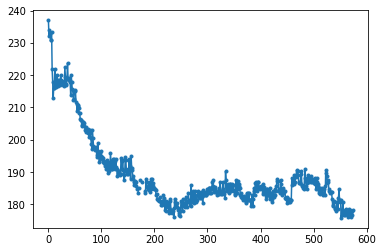

<Figure size 1500x1000 with 0 Axes>

In [55]:
mfp_measurements_df.Weight.plot(style='.-')
plt.figure(dpi=250)

In [56]:
fitbit_df.reset_index(inplace=True)
fitbit_df.tail()

,Date,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active
615,2018-08-23,10359,7.75889,3141,11,33,1454,710,159,38,52
616,2018-08-24,8696,6.51330,3216,17,51,1522,820,221,39,24
617,2018-08-25,165,0.12358,1977,0,0,109,757,15,0,0
618,2018-08-26,13286,11.05997,3080,25,76,1401,1247,103,9,81
619,2018-08-27,6360,4.76364,2801,8,24,1028,1254,134,29,23


In [57]:
fitbit_mfp_df = fitbit_df.merge(mfp_nutrition_df, left_on='Date', right_on='Date', how='left')
fitbit_mfp_df = fitbit_mfp_df.merge(mfp_measurements_df, left_on='Date', right_on='Date', how='left')

In [58]:
fitbit_mfp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 620 entries, 0 to 619
Data columns (total 99 columns):
Date                             620 non-null datetime64[ns]
Steps                            620 non-null int64
Distance                         620 non-null float64
Calories_Burned                  620 non-null int64
Floors                           620 non-null int64
Elevation                        620 non-null int64
Activity_Calories                620 non-null int64
Minutes_Sedentary                620 non-null int64
Minutes_Lightly_Active           620 non-null int64
Minutes_Fairly_Active            620 non-null int64
Minutes_Very_Active              620 non-null int64
Calories                         496 non-null float64
Fat (g)                          496 non-null float64
Saturated Fat                    496 non-null float64
Polyunsaturated Fat              496 non-null float64
Monounsaturated Fat              496 non-null float64
Trans Fat                        496 non-n

In [59]:
fitbit_mfp_df.tail(40)

,Date,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,...,Fiber_Snacks,Sugar_Snacks,Protein_(g)_Snacks,Vitamin_A_Snacks,Vitamin_C_Snacks,Calcium_Snacks,Iron_Snacks,Fitbit steps,Fitbit tracked sleep minutes,Weight
580,2018-07-19,7631,5.71561,2956,7,21,0,1440,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178.6
581,2018-07-20,15754,12.80378,3544,20,60,0,1440,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
582,2018-07-21,11485,8.60226,3099,11,33,0,1440,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
583,2018-07-22,4980,3.73002,3192,6,18,0,1440,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182.0
584,2018-07-23,10266,8.68437,2987,12,36,0,1440,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184.6
585,2018-07-24,9995,7.48625,2940,20,60,0,1440,0,0,...,0.5,0.0,5.8,7.0,0.0,0.0,0.0,NaN,NaN,181.4
586,2018-07-25,10743,9.01261,2887,14,42,0,1440,0,0,...,0.0,1.0,13.0,0.0,30.0,2.0,2.0,NaN,NaN,180.8
587,2018-07-26,7830,5.86467,2820,14,42,0,1440,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181.2
588,2018-07-27,4450,3.33305,2444,11,33,0,1440,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
589,2018-07-28,4031,3.01921,2237,2,6,0,1440,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
fitbit_mfp_df['Net_Calories'] = fitbit_mfp_df['Calories'] - fitbit_mfp_df['Calories_Burned']

fitbit_mfp_df['Day_of_week'] = fitbit_mfp_df['Date'].dt.day_name()

fitbit_mfp_df.set_index('Date', inplace=True)

fitbit_mfp_df.tail()

,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,...,Protein_(g)_Snacks,Vitamin_A_Snacks,Vitamin_C_Snacks,Calcium_Snacks,Iron_Snacks,Fitbit steps,Fitbit tracked sleep minutes,Weight,Net_Calories,Day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-23,10359,7.75889,3141,11,33,1454,710,159,38,52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178.0,-2706.0,Thursday
2018-08-24,8696,6.51330,3216,17,51,1522,820,221,39,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176.0,-1432.3,Friday
2018-08-25,165,0.12358,1977,0,0,109,757,15,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.6,Saturday
2018-08-26,13286,11.05997,3080,25,76,1401,1247,103,9,81,...,0.0,0.0,0.0,6.0,0.0,NaN,NaN,177.2,-1730.9,Sunday
2018-08-27,6360,4.76364,2801,8,24,1028,1254,134,29,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176.6,-519.7,Monday


In [61]:
fitbit_mfp_df.drop(['Saturated_Fat_Breakfast','Saturated_Fat_Lunch','Saturated_Fat_Dinner','Saturated_Fat_Snacks',
 'Polyunsaturated_Fat_Breakfast','Polyunsaturated_Fat_Lunch','Polyunsaturated_Fat_Dinner','Polyunsaturated_Fat_Snacks',
 'Monounsaturated_Fat_Breakfast','Monounsaturated_Fat_Lunch','Monounsaturated_Fat_Dinner','Monounsaturated_Fat_Snacks',
 'Trans_Fat_Breakfast','Trans_Fat_Lunch','Trans_Fat_Dinner','Trans_Fat_Snacks',
 'Cholesterol_Breakfast','Cholesterol_Lunch','Cholesterol_Dinner','Cholesterol_Snacks',
 'Sodium_(mg)_Breakfast','Sodium_(mg)_Lunch','Sodium_(mg)_Dinner','Sodium_(mg)_Snacks',
 'Potassium_Breakfast','Potassium_Lunch','Potassium_Dinner','Potassium_Snacks',
 'Fiber_Breakfast','Fiber_Lunch','Fiber_Dinner','Fiber_Snacks',
 'Vitamin_A_Breakfast','Vitamin_A_Lunch','Vitamin_A_Dinner','Vitamin_A_Snacks',
 'Vitamin_C_Breakfast','Vitamin_C_Lunch','Vitamin_C_Dinner','Vitamin_C_Snacks',
 'Calcium_Breakfast','Calcium_Lunch','Calcium_Dinner','Calcium_Snacks',
 'Iron_Breakfast','Iron_Lunch','Iron_Dinner','Iron_Snacks', 'Fitbit steps', 'Fitbit tracked sleep minutes'],
                   axis=1, inplace=True)

fitbit_mfp_df.tail()

,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,...,Sugar_Dinner,Protein_(g)_Dinner,Calories_Snacks,Fat_(g)_Snacks,Carbohydrates_(g)_Snacks,Sugar_Snacks,Protein_(g)_Snacks,Weight,Net_Calories,Day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-23,10359,7.75889,3141,11,33,1454,710,159,38,52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178.0,-2706.0,Thursday
2018-08-24,8696,6.51330,3216,17,51,1522,820,221,39,24,...,0.0,51.3,NaN,NaN,NaN,NaN,NaN,176.0,-1432.3,Friday
2018-08-25,165,0.12358,1977,0,0,109,757,15,0,0,...,2.2,45.2,NaN,NaN,NaN,NaN,NaN,NaN,-4.6,Saturday
2018-08-26,13286,11.05997,3080,25,76,1401,1247,103,9,81,...,15.0,22.7,30.0,3.0,3.0,0.0,0.0,177.2,-1730.9,Sunday
2018-08-27,6360,4.76364,2801,8,24,1028,1254,134,29,23,...,6.0,30.6,NaN,NaN,NaN,NaN,NaN,176.6,-519.7,Monday


In [62]:
fitbit_mfp_df.Weight = fitbit_mfp_df.Weight.interpolate(method='linear')

fitbit_mfp_df.head(50)

,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,...,Sugar_Dinner,Protein_(g)_Dinner,Calories_Snacks,Fat_(g)_Snacks,Carbohydrates_(g)_Snacks,Sugar_Snacks,Protein_(g)_Snacks,Weight,Net_Calories,Day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-16,0,0.00000,1856,0,0,0,1440,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday
2016-12-17,0,0.00000,1855,0,0,0,1440,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saturday
2016-12-18,0,0.00000,1855,0,0,0,1440,0,0,0,...,NaN,NaN,392.4,29.4,24.1,10.4,21.7,NaN,-1110.2,Sunday
2016-12-19,0,0.00000,1855,0,0,0,1440,0,0,0,...,15.0,5.0,NaN,NaN,NaN,NaN,NaN,186.800000,-660.1,Monday
2016-12-20,0,0.00000,1854,0,0,0,1440,0,0,0,...,14.1,47.7,NaN,NaN,NaN,NaN,NaN,186.483333,-154.3,Tuesday
2016-12-21,0,0.00000,1854,0,0,0,1440,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,186.166667,-978.3,Wednesday
2016-12-22,0,0.00000,1854,0,0,0,1440,0,0,0,...,0.0,31.0,210.0,11.0,27.0,16.0,3.0,185.850000,-142.5,Thursday
2016-12-23,0,0.00000,1853,0,0,0,1440,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185.533333,-1036.9,Friday
2016-12-24,0,0.00000,1853,0,0,0,1440,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185.216667,-903.0,Saturday


In [63]:
fitbit_mfp_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 620 entries, 2016-12-16 to 2018-08-27
Data columns (total 50 columns):
Steps                          620 non-null int64
Distance                       620 non-null float64
Calories_Burned                620 non-null int64
Floors                         620 non-null int64
Elevation                      620 non-null int64
Activity_Calories              620 non-null int64
Minutes_Sedentary              620 non-null int64
Minutes_Lightly_Active         620 non-null int64
Minutes_Fairly_Active          620 non-null int64
Minutes_Very_Active            620 non-null int64
Calories                       496 non-null float64
Fat (g)                        496 non-null float64
Saturated Fat                  496 non-null float64
Polyunsaturated Fat            496 non-null float64
Monounsaturated Fat            496 non-null float64
Trans Fat                      496 non-null float64
Cholesterol                    496 non-null float64
Sodium (mg

In [64]:
fitbit_mfp_df.head(40)

,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,...,Sugar_Dinner,Protein_(g)_Dinner,Calories_Snacks,Fat_(g)_Snacks,Carbohydrates_(g)_Snacks,Sugar_Snacks,Protein_(g)_Snacks,Weight,Net_Calories,Day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-16,0,0.00000,1856,0,0,0,1440,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday
2016-12-17,0,0.00000,1855,0,0,0,1440,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saturday
2016-12-18,0,0.00000,1855,0,0,0,1440,0,0,0,...,NaN,NaN,392.4,29.4,24.1,10.4,21.7,NaN,-1110.2,Sunday
2016-12-19,0,0.00000,1855,0,0,0,1440,0,0,0,...,15.0,5.0,NaN,NaN,NaN,NaN,NaN,186.800000,-660.1,Monday
2016-12-20,0,0.00000,1854,0,0,0,1440,0,0,0,...,14.1,47.7,NaN,NaN,NaN,NaN,NaN,186.483333,-154.3,Tuesday
2016-12-21,0,0.00000,1854,0,0,0,1440,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,186.166667,-978.3,Wednesday
2016-12-22,0,0.00000,1854,0,0,0,1440,0,0,0,...,0.0,31.0,210.0,11.0,27.0,16.0,3.0,185.850000,-142.5,Thursday
2016-12-23,0,0.00000,1853,0,0,0,1440,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185.533333,-1036.9,Friday
2016-12-24,0,0.00000,1853,0,0,0,1440,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185.216667,-903.0,Saturday


In [65]:
fitbit_mfp_df.columns

Index(['Steps', 'Distance', 'Calories_Burned', 'Floors', 'Elevation',
       'Activity_Calories', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories', 'Fat (g)',
       'Saturated Fat', 'Polyunsaturated Fat', 'Monounsaturated Fat',
       'Trans Fat', 'Cholesterol', 'Sodium (mg)', 'Potassium',
       'Carbohydrates (g)', 'Fiber', 'Sugar', 'Protein (g)', 'Vitamin A',
       'Vitamin C', 'Calcium', 'Iron', 'Calories_Breakfast',
       'Fat_(g)_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
       'Protein_(g)_Breakfast', 'Calories_Lunch', 'Fat_(g)_Lunch',
       'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
       'Calories_Dinner', 'Fat_(g)_Dinner', 'Carbohydrates_(g)_Dinner',
       'Sugar_Dinner', 'Protein_(g)_Dinner', 'Calories_Snacks',
       'Fat_(g)_Snacks', 'Carbohydrates_(g)_Snacks', 'Sugar_Snacks',
       'Protein_(g)_Snacks', 'Weight', 'Net_Calories', 'Day_of_week'],
      dtype='objec

In [66]:
day_of_week_df = fitbit_mfp_df.groupby(fitbit_mfp_df.Day_of_week)[['Steps', 'Distance', 'Calories_Burned',
                                                                   'Floors', 'Elevation',
       'Activity_Calories', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories', 'Fat (g)',
       'Saturated Fat', 'Polyunsaturated Fat', 'Monounsaturated Fat',
       'Trans Fat', 'Cholesterol', 'Sodium (mg)', 'Potassium',
       'Carbohydrates (g)', 'Fiber', 'Sugar', 'Protein (g)', 'Vitamin A',
       'Vitamin C', 'Calcium', 'Iron', 'Calories_Breakfast',
       'Fat_(g)_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
       'Protein_(g)_Breakfast', 'Calories_Lunch', 'Fat_(g)_Lunch',
       'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
       'Calories_Dinner', 'Fat_(g)_Dinner', 'Carbohydrates_(g)_Dinner',
       'Sugar_Dinner', 'Protein_(g)_Dinner', 'Calories_Snacks',
       'Fat_(g)_Snacks', 'Carbohydrates_(g)_Snacks', 'Sugar_Snacks',
       'Protein_(g)_Snacks', 'Weight', 'Net_Calories', 'Day_of_week']].mean()


day_of_week_df

,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,...,Carbohydrates_(g)_Dinner,Sugar_Dinner,Protein_(g)_Dinner,Calories_Snacks,Fat_(g)_Snacks,Carbohydrates_(g)_Snacks,Sugar_Snacks,Protein_(g)_Snacks,Weight,Net_Calories
Day_of_week,,,,,,,,,,,,,,,,,,,,,
Friday,7949.359551,6.100120,2893.685393,6.528090,19.629213,1059.067416,1009.337079,180.853933,8.977528,16.202247,...,61.264516,6.461290,39.067742,299.457895,14.078947,34.400000,13.284211,9.684211,182.990285,-1608.488889
Monday,6743.966292,5.175902,2688.000000,4.640449,13.977528,869.786517,1076.584270,127.393258,9.348315,23.853933,...,69.188095,5.502381,48.900000,212.216667,10.166667,21.108333,6.391667,9.412500,184.196181,-1195.480519
Saturday,5514.820225,4.235007,2677.471910,7.089888,21.438202,781.202247,1038.247191,102.426966,13.404494,23.292135,...,68.733333,11.827778,34.433333,265.760000,11.560000,22.700000,10.030000,17.100000,183.079041,-1424.407692
Sunday,4782.921348,3.679812,2551.359551,5.146067,15.494382,702.179775,1088.224719,85.123596,12.157303,24.078652,...,73.506897,12.613793,43.106897,351.000000,16.476471,34.270588,17.105882,18.788235,183.586358,-1051.445455
Thursday,7365.511364,5.715491,2780.852273,4.420455,13.284091,857.477273,1028.068182,145.545455,6.340909,14.215909,...,52.270213,6.072340,51.757447,224.188000,10.208000,20.964000,9.232000,8.216000,183.071007,-1238.858228
Tuesday,7318.181818,5.671428,2738.647727,5.215909,15.704545,911.261364,1044.488636,148.397727,8.636364,17.397727,...,53.630909,8.998182,46.065455,232.770968,10.348387,24.061290,11.032258,11.277419,183.974288,-1124.070000
Wednesday,7112.386364,5.472372,2744.863636,3.909091,11.761364,899.102273,1024.886364,155.465909,7.477273,14.261364,...,57.493220,6.833898,39.322034,201.790000,7.640000,20.300000,5.203333,7.506667,183.384702,-1155.691358


In [67]:
## FILL NA VALUES WITH MEAN OF THAT COLUMN BY THE DAY OF THE WEEK

#fitbit_mfp_df['Calories_Breakfast'].fillna((sub2['income'].mean()), inplace=True)

In [68]:
day_of_week_df['Steps']['Friday']

7949.359550561798

In [69]:
fmfp_df = fitbit_mfp_df[['Steps', 'Calories', 'Weight']]

fmfp_df.reset_index(inplace=True)

fmfp_df.head(50)

,Date,Steps,Calories,Weight
0,2016-12-16,0,NaN,NaN
1,2016-12-17,0,NaN,NaN
2,2016-12-18,0,744.8,NaN
3,2016-12-19,0,1194.9,186.800000
4,2016-12-20,0,1699.7,186.483333
5,2016-12-21,0,875.7,186.166667
6,2016-12-22,0,1711.5,185.850000
7,2016-12-23,0,816.1,185.533333
8,2016-12-24,0,950.0,185.216667
9,2016-12-25,1178,NaN,184.900000


In [70]:
## INTERPOLATING WEIGHTS THAT ARE MISSING

fmfp_df.Weight = fmfp_df.Weight.interpolate(method='linear')
fmfp_df['Day_of_week'] = fmfp_df['Date'].dt.day_name()

fmfp_df.head(50)

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Date,Steps,Calories,Weight,Day_of_week
0,2016-12-16,0,NaN,NaN,Friday
1,2016-12-17,0,NaN,NaN,Saturday
2,2016-12-18,0,744.8,NaN,Sunday
3,2016-12-19,0,1194.9,186.800000,Monday
4,2016-12-20,0,1699.7,186.483333,Tuesday
5,2016-12-21,0,875.7,186.166667,Wednesday
6,2016-12-22,0,1711.5,185.850000,Thursday
7,2016-12-23,0,816.1,185.533333,Friday
8,2016-12-24,0,950.0,185.216667,Saturday
9,2016-12-25,1178,NaN,184.900000,Sunday


In [71]:
fmfp_df.groupby(fmfp_df.Day_of_week)[['Calories','Steps']].mean()

,Calories,Steps
Day_of_week,,
Friday,1276.622222,7949.359551
Monday,1512.506494,6743.966292
Saturday,1179.976923,5514.820225
Sunday,1455.554545,4782.921348
Thursday,1505.762025,7365.511364
Tuesday,1578.055000,7318.181818
Wednesday,1555.049383,7112.386364


Text(0.5,1,'Time Series of Weight')

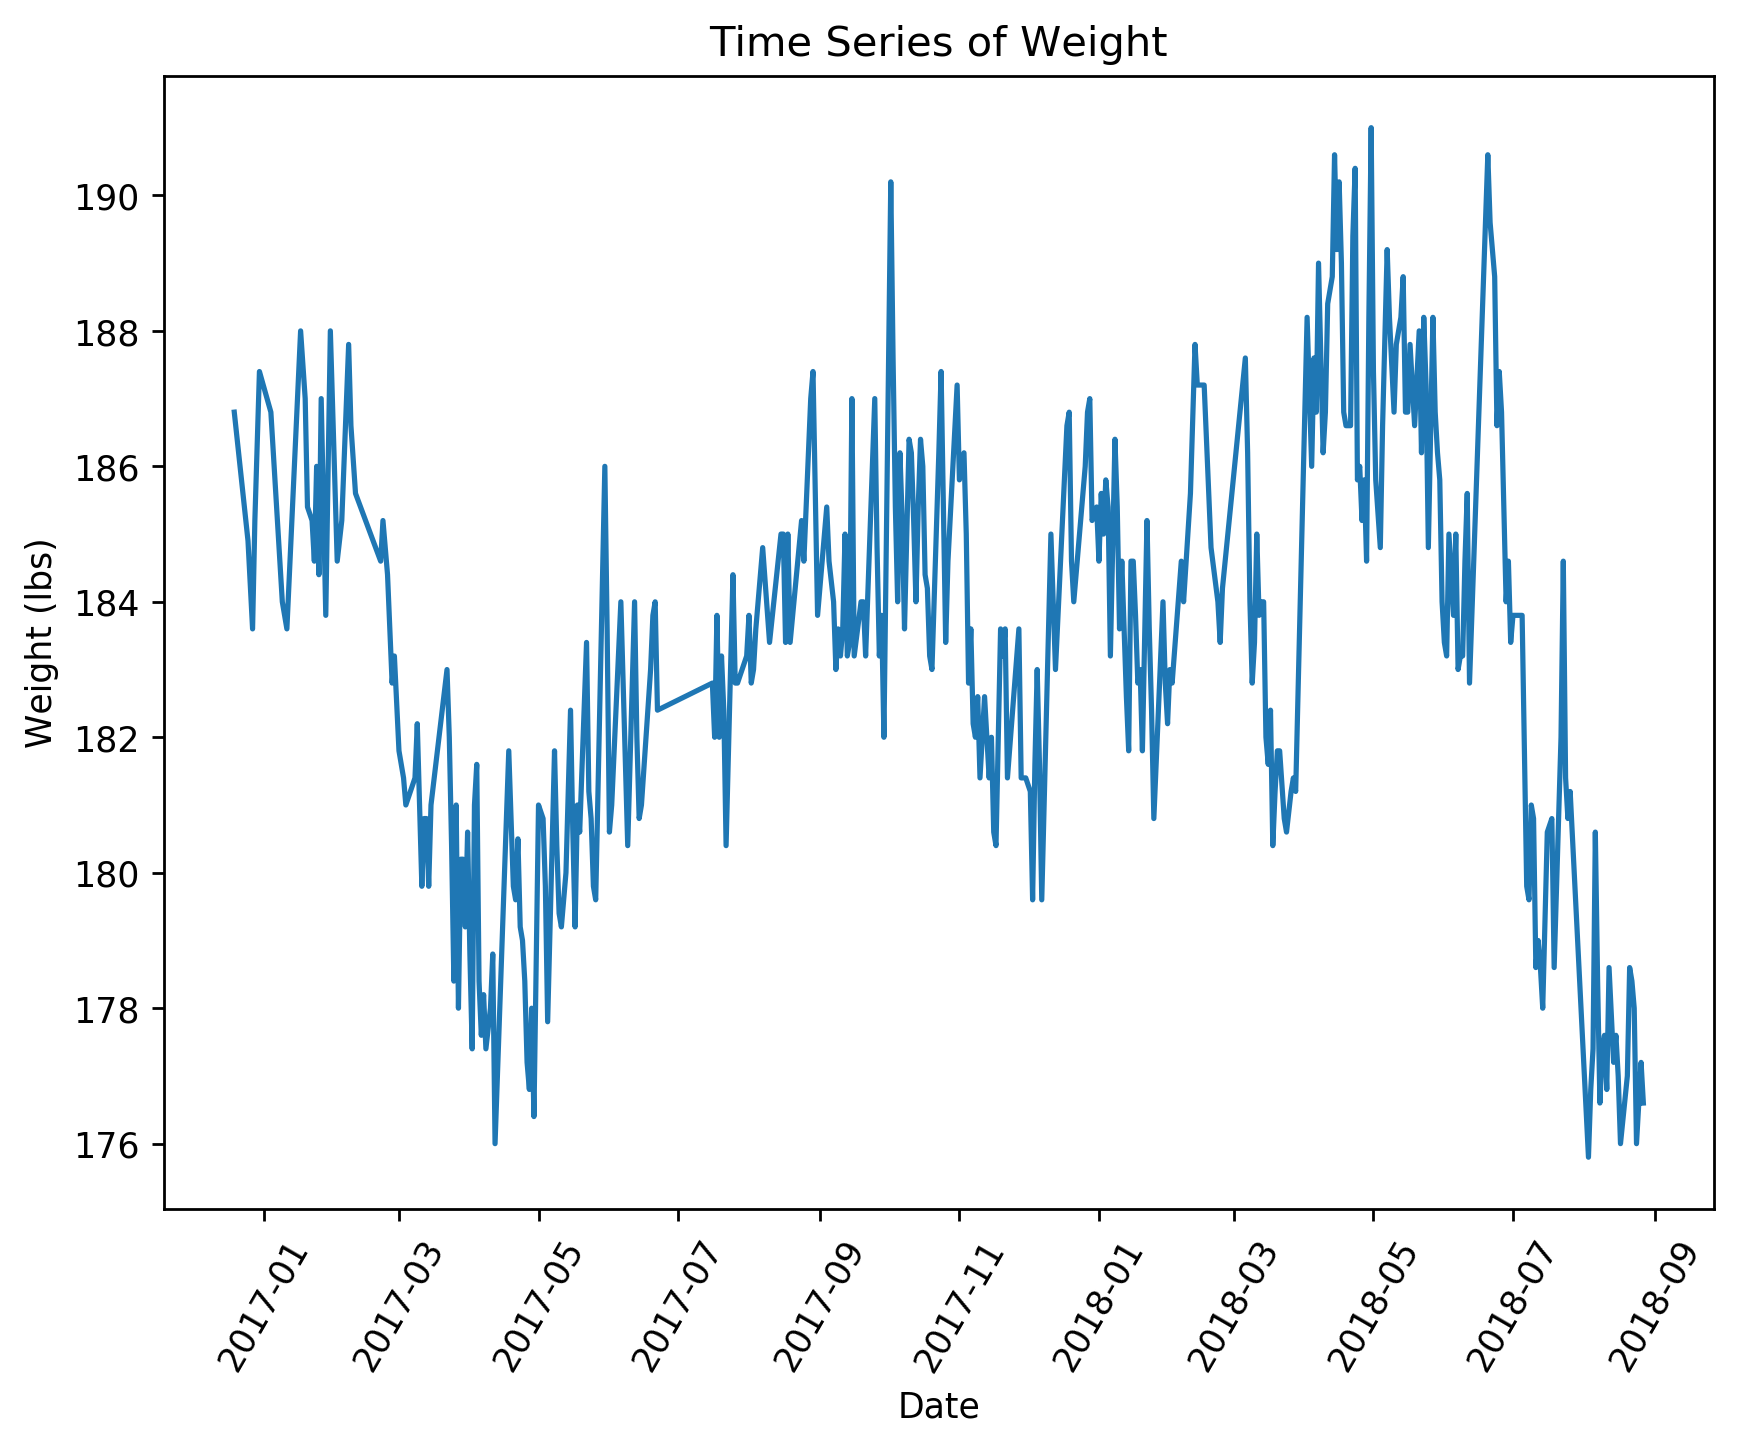

In [72]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=250, facecolor='w', edgecolor='k');

plt.plot(fmfp_df.Date, fmfp_df.Weight);


plt.xticks(rotation=60)
plt.xlabel('Date')
plt.ylabel('Weight (lbs)')
plt.title('Time Series of Weight')

Text(0.5,1,'Time Series of Weight')

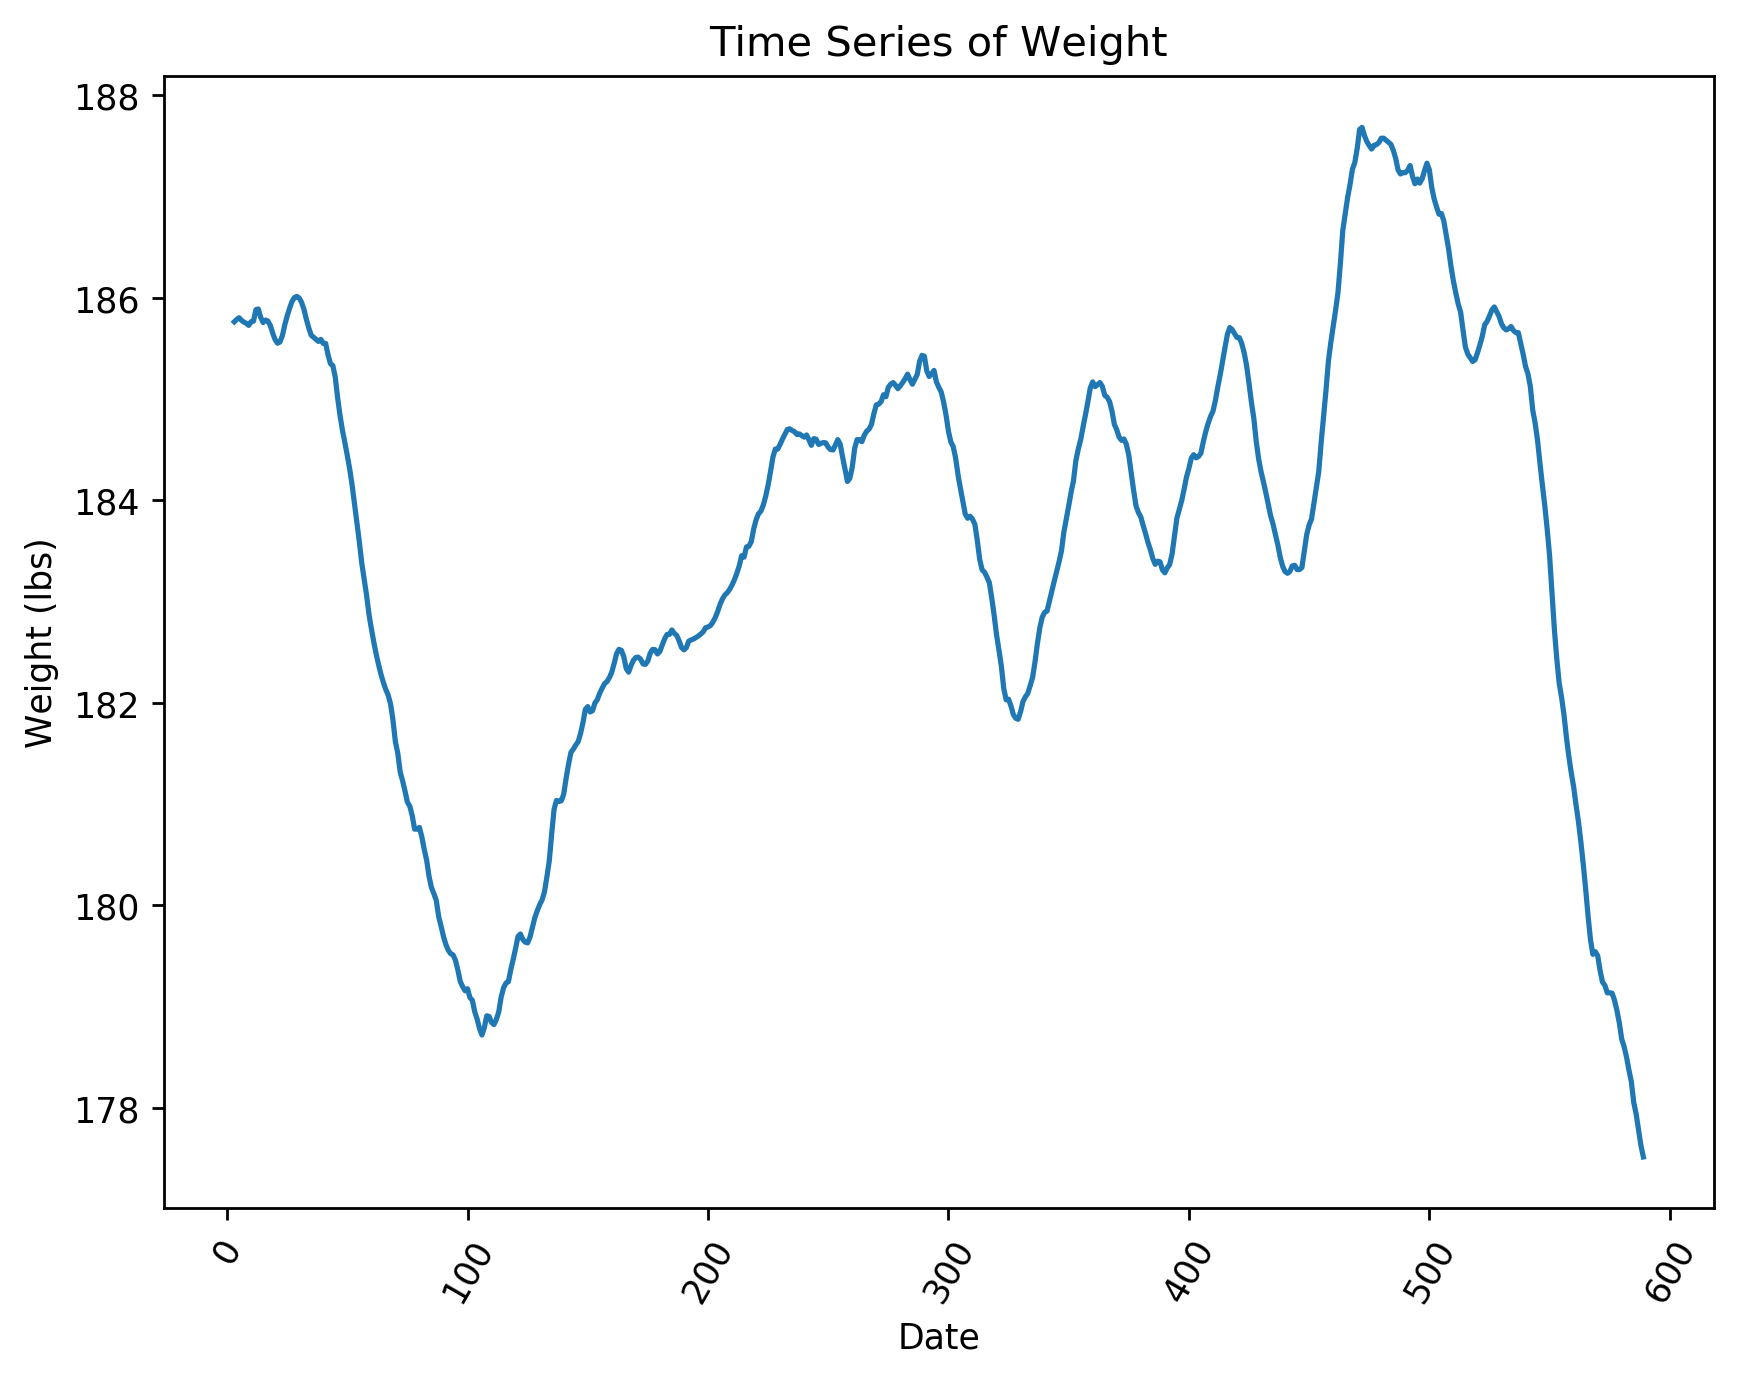

In [73]:
from collections import deque
window = 30
weight_rolling = deque(fmfp_df.Weight[: window], maxlen=window)
smooth_weight = []

for w in fmfp_df.Weight[window:]:
    smooth_weight.append(np.mean(weight_rolling))
    weight_rolling.append(w)
    
figure(num=None, figsize=(8, 6), dpi=250, facecolor='w', edgecolor='k');

    
plt.plot(smooth_weight)
plt.xticks(rotation=60)
plt.xlabel('Date')
plt.ylabel('Weight (lbs)')
plt.title('Time Series of Weight')

In [74]:
len(smooth_weight)

590

Text(0.5,1,'Time Series of Calorie Intake')

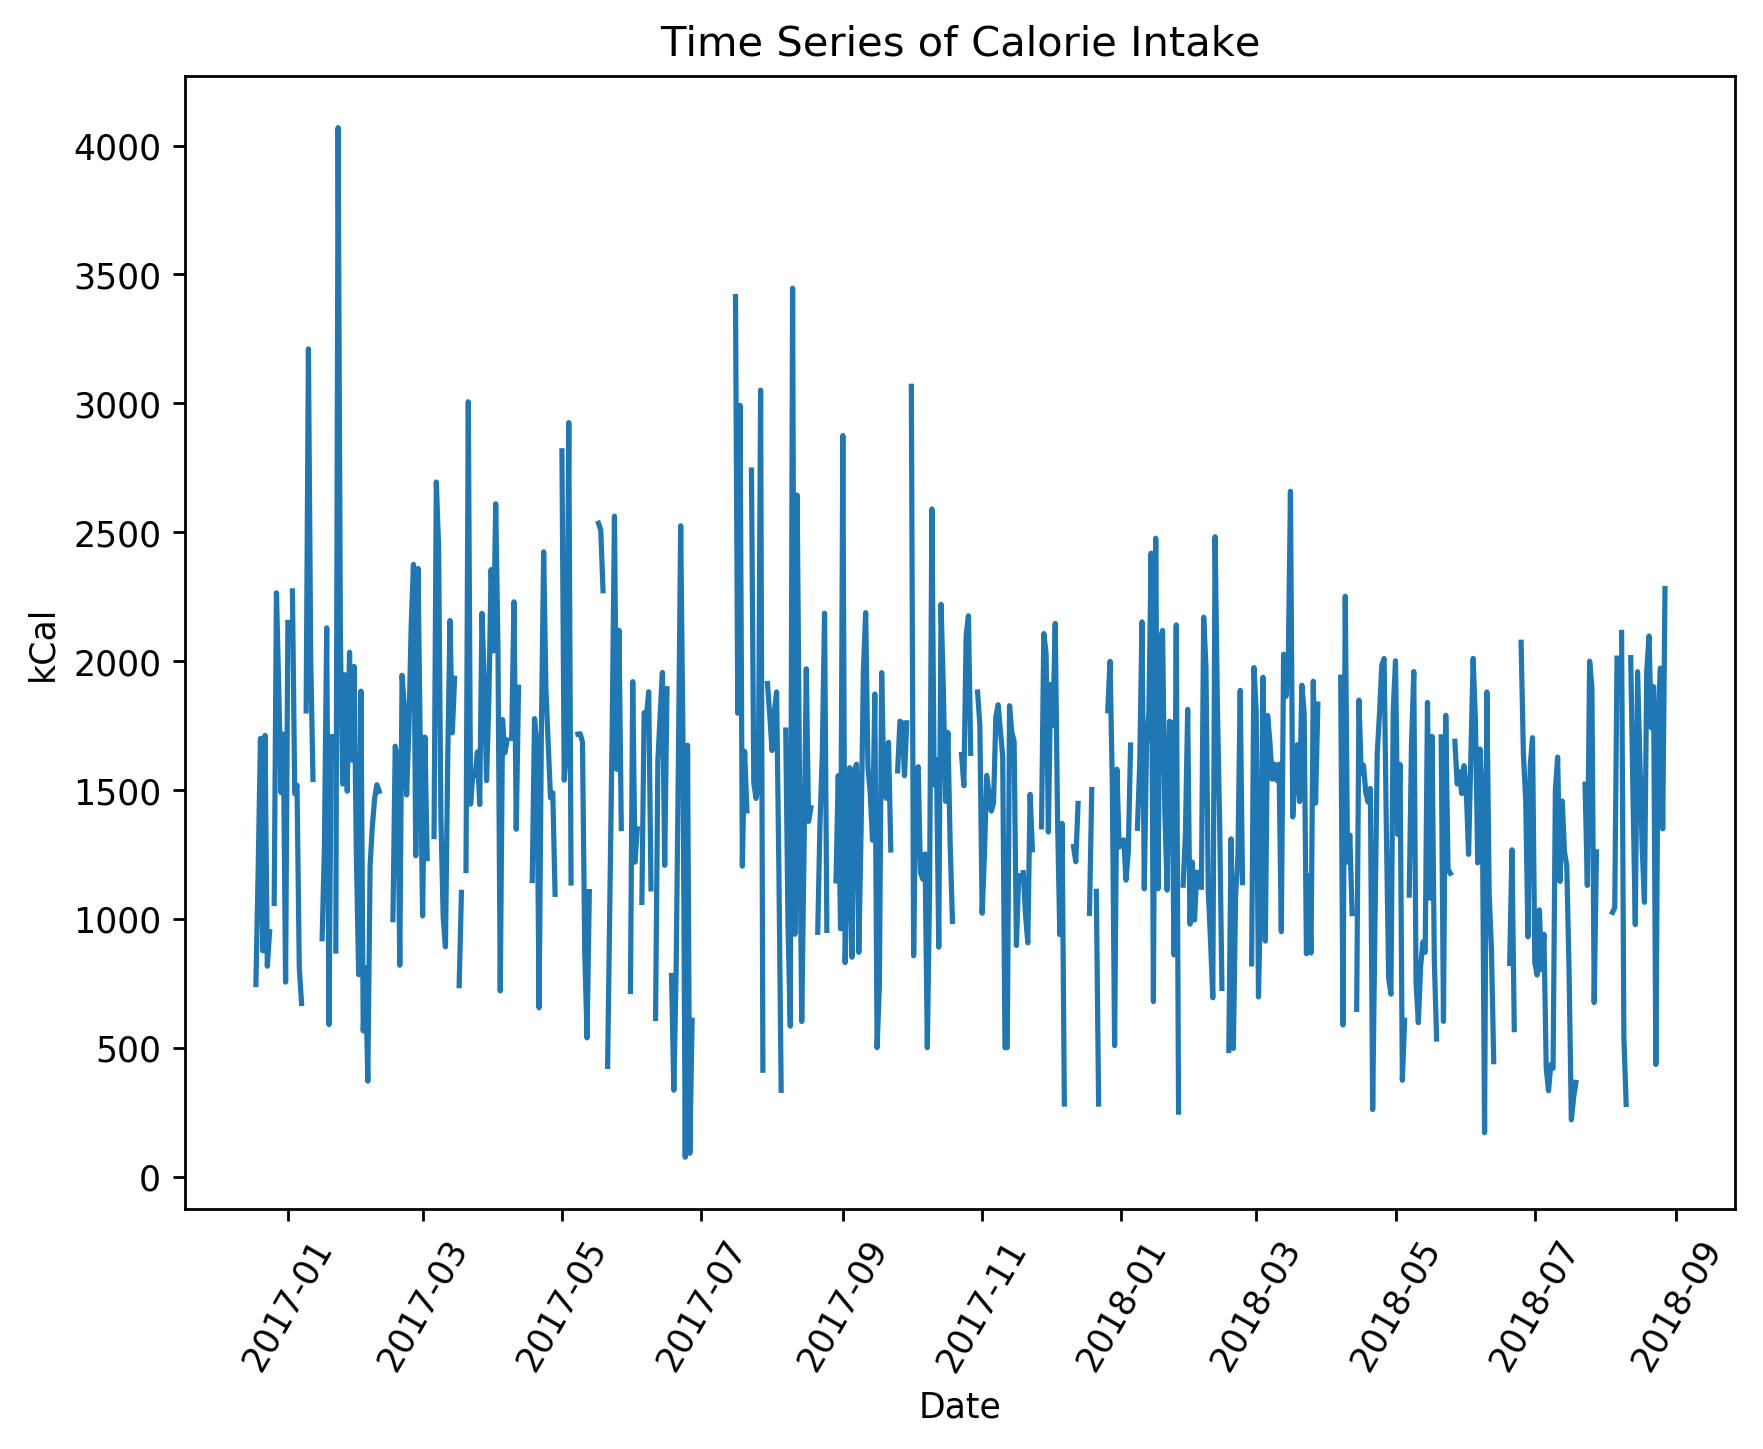

In [75]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=250, facecolor='w', edgecolor='k');

plt.plot(fmfp_df.Date, fmfp_df.Calories);


plt.xticks(rotation=60)
plt.xlabel('Date')
plt.ylabel('kCal')
plt.title('Time Series of Calorie Intake')

In [76]:
## IMPUTE/FILLNA VALUES OF STEPS/NUTRITIONAL INFORMATION BASED ON DAY OF WEEK

## FILLNA OF INDIVIDUAL MEALS FIRST, THEN IF TOTAL CALORIES != SUM OF ALL MEALS, SET DAILY NUTRITIONAL
## INFO EQUAL TO THE SUM OF THE MEALS (SANS SNACKS)

In [81]:
#fmfp_df.set_index('Date', inplace=True)
fmfp_df["Weight_MA7"] = fmfp_df.Weight.rolling(window=7, center=True).mean()
fmfp_df["Weight_MA30"] = fmfp_df.Weight.rolling(window=30, center=True).mean()
fmfp_df.head(20)

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Steps,Calories,Weight,Day_of_week,Weight_MAy,Weight_MA7,Weight_MA30
Date,,,,,,,
2016-12-16,0,NaN,NaN,Friday,NaN,NaN,NaN
2016-12-17,0,NaN,NaN,Saturday,NaN,NaN,NaN
2016-12-18,0,744.8,NaN,Sunday,NaN,NaN,NaN
2016-12-19,0,1194.9,186.800000,Monday,NaN,NaN,NaN
2016-12-20,0,1699.7,186.483333,Tuesday,NaN,NaN,NaN
2016-12-21,0,875.7,186.166667,Wednesday,NaN,NaN,NaN
2016-12-22,0,1711.5,185.850000,Thursday,185.850000,185.850000,NaN
2016-12-23,0,816.1,185.533333,Friday,185.485714,185.485714,NaN
2016-12-24,0,950.0,185.216667,Saturday,185.073810,185.073810,NaN


Text(0.5,1,'Time Series of Weight (30 Day RWindow)')

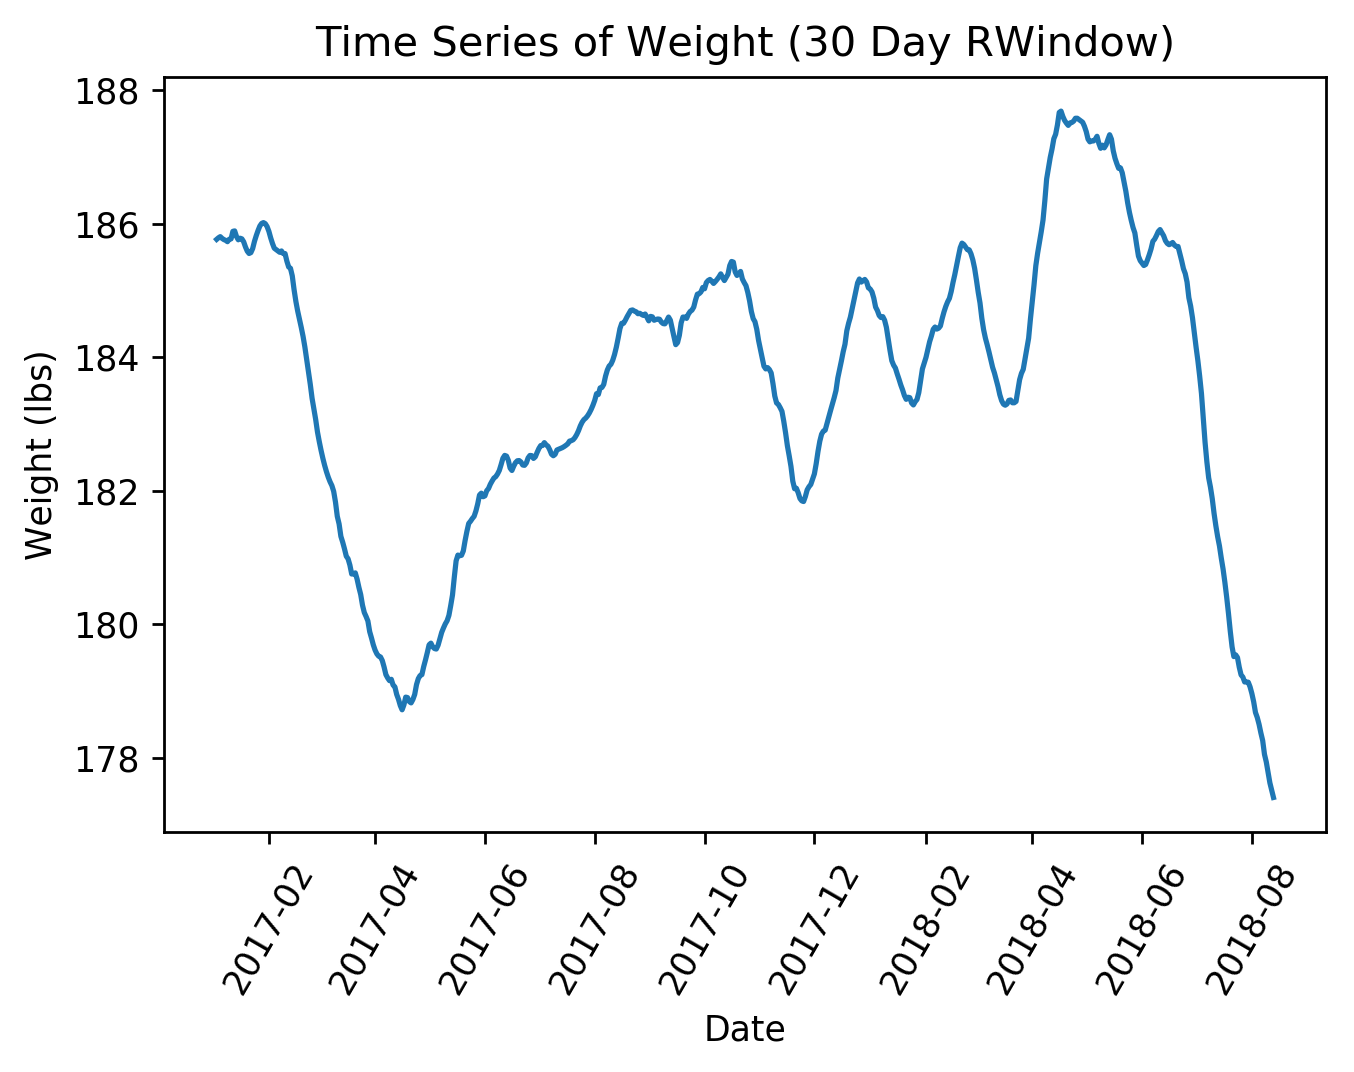

In [88]:
plt.figure(dpi=250)
plt.plot(fmfp_df["Weight_MA30"])
plt.xticks(rotation=60)
plt.xlabel('Date')
plt.ylabel('Weight (lbs)')
plt.title('Time Series of Weight (30 Day RWindow)')